## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten - Pilotstudie 2017
# Datenanalyse


#### Werkzeuge und Daten importieren

In [166]:
import pandas as pd
import numpy as np
import matplotlib
from funktionen import *
import seaborn as sns
sns.set(style="white") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [95]:
Daten1 = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_P2017_ber')

In [96]:
Daten1.shape

(68, 328)

In [97]:
Daten1.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b22a_6,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9_1,D-Q9_2,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics,porc_nan
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,0,...,0,0,0,0,0,1,Gratificante y útil,0,Unknown,55.251142
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,0,...,0,0,0,0,0,1,Una encuesta muy completa que me ha servido pa...,0,Unknown,54.794521
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,0,...,0,0,0,0,0,1,0,0,Unknown,56.164384


#### Glossar erstellen 

Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [98]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss')

#### Untergruppen und Listen für die Analyse

In [99]:
Liste_A_Q2 = [col for col in Daten1.columns if 'A-Q2' in col]

In [100]:
Liste_A_Q3 = [col for col in Daten1.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [101]:
Liste_C_Q1 = [col for col in Daten1.columns if 'C-Q1' in col]

In [102]:
Daten = Daten1[Daten1['Finished']=='1']

In [103]:
Daten = Daten.fillna(0)

### A-Q2

In [104]:
df_describe1(Daten1,Liste_A_Q2)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
A-Q2_1,68.0,2.426471,1.069470,1.0,2.00,2.0,3.0,5.0,2.0,-0.201385,0.498849
A-Q2_2,68.0,3.544118,0.741797,2.0,3.00,4.0,4.0,5.0,4.0,-0.198322,-0.155794
A-Q2_3,68.0,4.102941,0.883340,2.0,3.75,4.0,5.0,5.0,4.0,-0.541803,-0.607272
A-Q2_4,68.0,4.294118,0.881972,1.0,4.00,5.0,5.0,5.0,5.0,1.265852,-1.159184
A-Q2_5,68.0,3.279412,1.076833,1.0,3.00,3.0,4.0,5.0,3.0,-0.119913,-0.512400
A-Q2_6,68.0,2.941176,1.303066,1.0,2.00,3.0,4.0,5.0,3.0,-1.006900,0.028426
A-Q2_7,68.0,4.264706,0.971499,1.0,4.00,5.0,5.0,5.0,5.0,1.393683,-1.366472


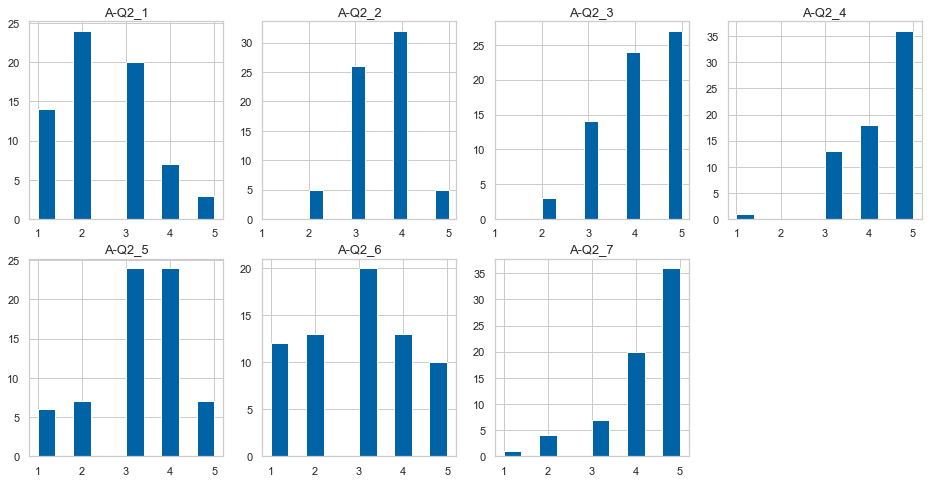

In [105]:
graf_hist(Daten1,Liste_A_Q2,16,8,2,4)

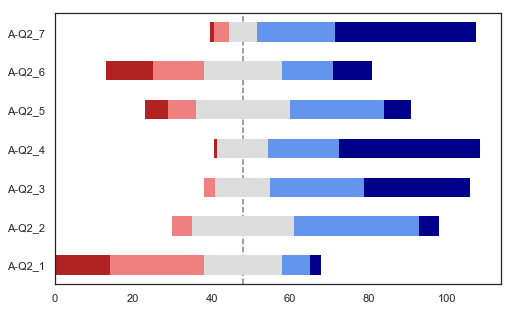

In [167]:
graf_likert(Daten1,Liste_A_Q2,5)

In [107]:
df_spearman(Daten1,Liste_A_Q2)

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,1,0.363764,0.365814,0.203051,-0.313189,-0.0470035,0.0249181
A-Q2_2,0.363764,1,0.399743,0.164334,-0.0110327,0.00657616,0.041274
A-Q2_3,0.365814,0.399743,1,0.347242,-0.223996,-0.0918076,0.00288164
A-Q2_4,0.203051,0.164334,0.347242,1,0.0227889,0.183877,-0.000184931
A-Q2_5,-0.313189,-0.0110327,-0.223996,0.0227889,1,0.436608,0.188173
A-Q2_6,-0.0470035,0.00657616,-0.0918076,0.183877,0.436608,1,0.0800433
A-Q2_7,0.0249181,0.041274,0.00288164,-0.000184931,0.188173,0.0800433,1


In [108]:
df_spearman_pv(Daten1,Liste_A_Q2)

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,0,0.00229402,0.00215687,0.0967722,0.00930821,0.703481,0.84015
A-Q2_2,0.00229402,0,0.000732181,0.180527,0.928849,0.957554,0.738239
A-Q2_3,0.00215687,0.000732181,0,0.00371734,0.0663158,0.456511,0.981393
A-Q2_4,0.0967722,0.180527,0.00371734,0,0.853651,0.133353,0.998806
A-Q2_5,0.00930821,0.928849,0.0663158,0.853651,0,0.000197455,0.124364
A-Q2_6,0.703481,0.957554,0.456511,0.133353,0.000197455,0,0.516429
A-Q2_7,0.84015,0.738239,0.981393,0.998806,0.124364,0.516429,0


### A-Q3

In [109]:
df_describe1(Daten,Liste_A_Q3)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
A-Q3_1,66.0,3.060606,1.148628,1.0,2.00,3.0,4.00,5.0,3.0,-0.700784,0.004115
A-Q3_2,66.0,4.000000,1.066987,0.0,4.00,4.0,5.00,5.0,4.0,2.506261,-1.410577
A-Q3_3,66.0,2.863636,1.538094,0.0,1.25,3.0,4.00,5.0,3.0,-1.290763,-0.025837
A-Q3_4,66.0,4.242424,0.929195,1.0,4.00,4.0,5.00,5.0,4.0,1.692909,-1.339912
A-Q3_5,66.0,3.227273,1.187051,1.0,2.00,3.0,4.00,5.0,3.0,-0.908637,-0.172848
A-Q3_6,66.0,2.969697,1.276651,1.0,2.00,3.0,4.00,5.0,3.0,-1.096154,0.058199
A-Q3_7,66.0,3.939394,1.005811,2.0,3.00,4.0,5.00,5.0,4.0,-0.830585,-0.530586
A-Q3_8,66.0,3.984848,1.045024,1.0,3.00,4.0,5.00,5.0,4.0,-0.317430,-0.719742
A-Q3_9,66.0,3.969697,1.136387,1.0,3.00,4.0,5.00,5.0,4.0,0.375892,-1.041841
A-Q3_10,66.0,4.303030,0.893906,2.0,4.00,5.0,5.00,5.0,5.0,0.585911,-1.178406


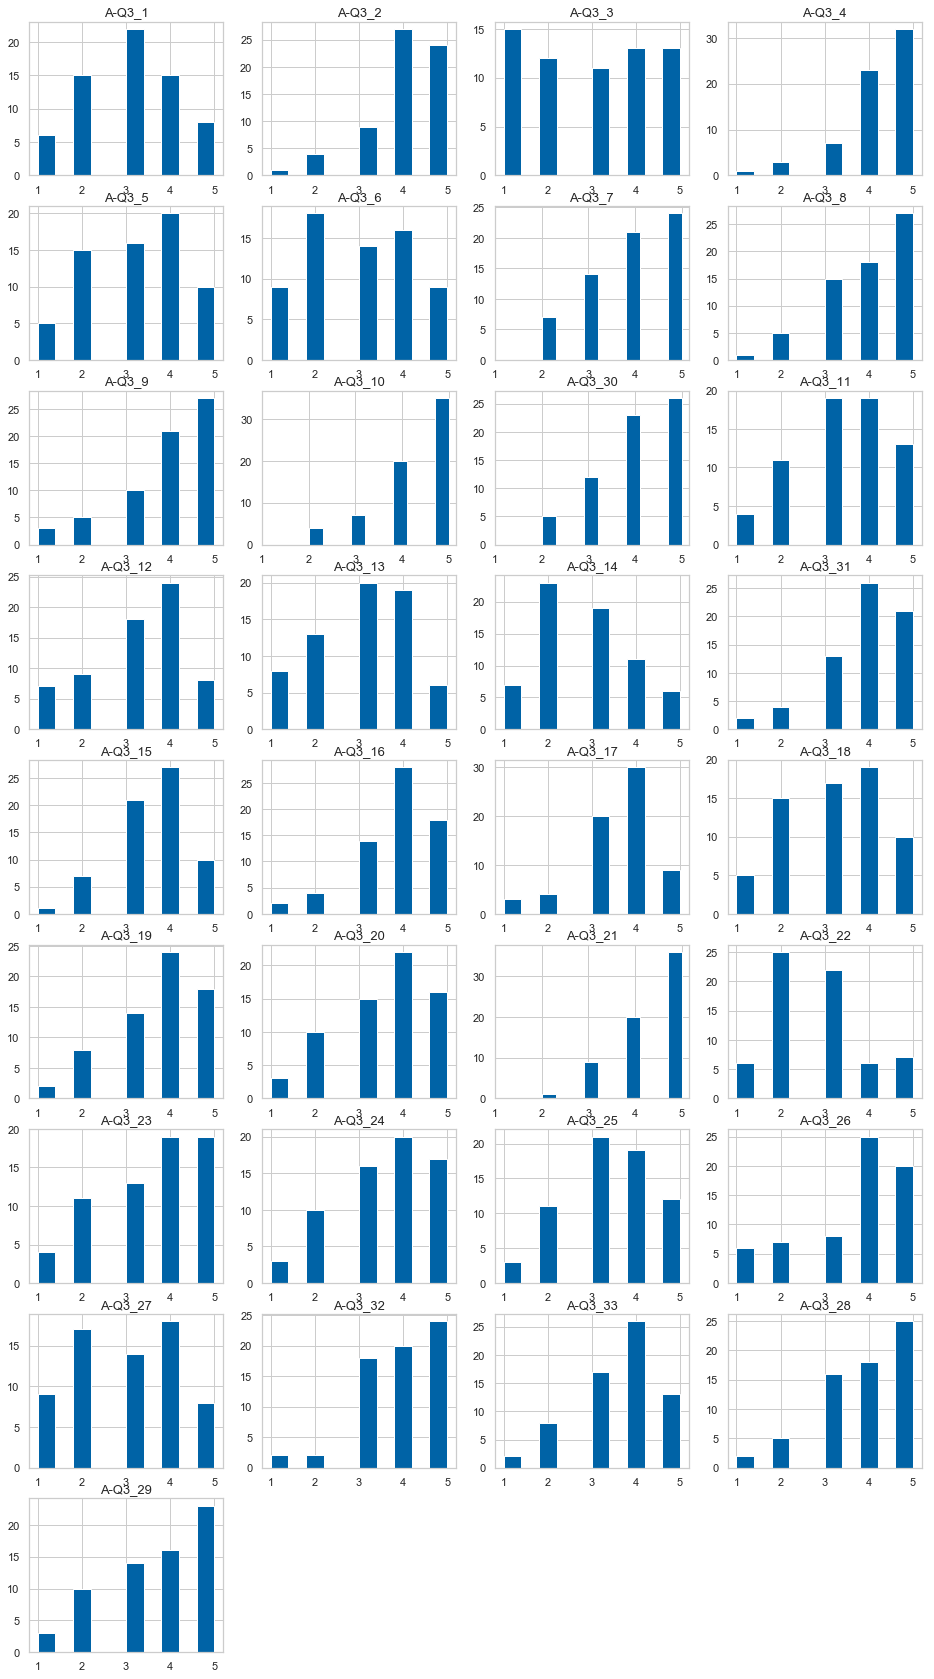

In [110]:
graf_hist(Daten,Liste_A_Q3,16,30,9,4)

In [111]:
Daten_A3 = Daten[Liste_A_Q3].astype(int64)

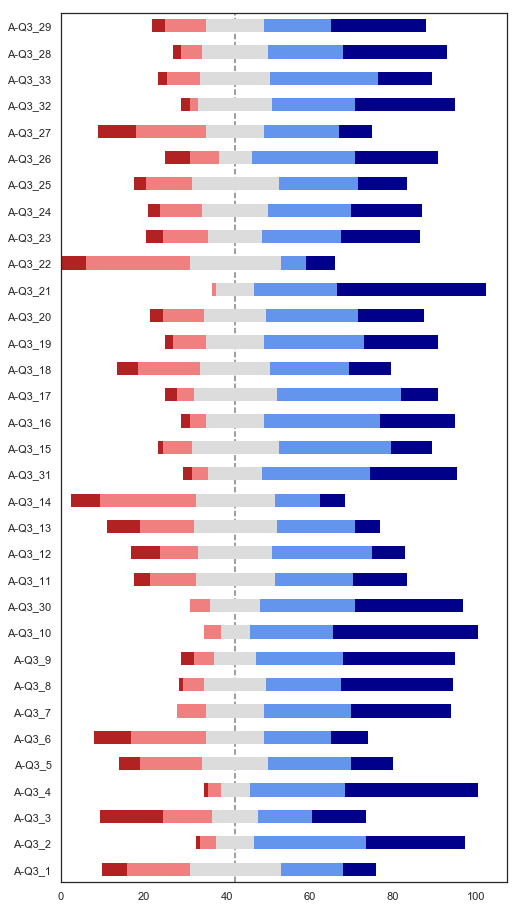

In [168]:
graf_likert1(Daten_A3,Liste_A_Q3,16)

In [113]:
df_spearman(Daten,Liste_A_Q3)

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_10,A-Q3_30,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_14,A-Q3_31,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_26,A-Q3_27,A-Q3_32,A-Q3_33,A-Q3_28,A-Q3_29
A-Q3_1,1,0.483732,0.333847,0.421907,0.203699,0.223761,0.180679,0.301229,0.158649,0.270698,0.0326454,0.361876,0.368681,0.238951,0.121334,-0.062758,-0.053693,0.115001,0.0225715,0.370817,0.33652,0.346408,0.180578,0.224769,0.206181,0.123078,0.165663,0.156357,0.0641807,0.0104553,-0.0205187,0.184397,0.0870334
A-Q3_2,0.483732,1,0.163428,0.432462,0.494037,0.322935,0.289565,0.327625,0.266099,0.104074,0.260902,0.300583,0.241335,0.0765606,0.0459698,0.0972559,-0.0120144,0.200017,0.0698916,0.165664,0.188353,0.295394,0.132784,0.239105,0.259325,0.129383,0.173624,0.216505,0.216805,0.046318,0.066868,0.376314,0.0941051
A-Q3_3,0.333847,0.163428,1,0.214698,0.261772,0.110931,-0.00381579,0.0926535,-0.160963,0.051565,-0.0324717,0.0413454,-0.149752,-0.0236012,0.0918095,-0.232375,-0.0894298,0.210004,0.0816872,0.0462055,0.113014,0.154628,0.0544577,0.200587,0.248171,0.265712,0.225812,-0.0169893,0.0239602,-0.0913954,0.04448,0.117277,0.123696
A-Q3_4,0.421907,0.432462,0.214698,1,0.313138,0.271393,0.162142,0.232983,0.181337,0.324492,0.265004,0.280151,0.254129,0.139893,-0.0264943,0.184779,0.304957,0.334452,0.0179596,0.418801,0.396736,0.466002,0.237245,0.306638,0.278802,0.294549,0.373161,0.386171,0.236219,0.117942,0.218704,0.344297,0.205511
A-Q3_5,0.203699,0.494037,0.261772,0.313138,1,0.342542,0.0916342,0.0721042,0.0794922,0.108561,0.153844,-0.0248833,0.0377446,0.0688222,0.0497895,0.0925385,-0.0933532,0.205584,0.0353872,-0.00664055,0.195294,0.236409,-0.0329723,0.17602,0.202471,0.215013,0.145364,0.138363,0.312657,0.1105,0.189559,0.246305,0.120033
A-Q3_6,0.223761,0.322935,0.110931,0.271393,0.342542,1,0.397015,0.313251,0.261307,0.257568,0.253633,0.172204,0.188003,0.192993,0.226541,0.164509,-0.0213604,0.214684,-0.0151317,0.324445,0.30449,0.184079,0.247091,0.282305,-0.0497293,-0.0917776,0.263902,0.157336,0.178847,0.241073,0.0557828,0.199203,0.05807
A-Q3_7,0.180679,0.289565,-0.00381579,0.162142,0.0916342,0.397015,1,0.708532,0.707425,0.35856,0.275084,0.277546,0.239098,0.105712,0.132531,0.154172,0.248579,0.141883,0.181436,0.11708,0.08509,0.0341448,0.295719,0.0875901,-0.0106128,-0.095779,0.105108,0.0311149,-0.0862075,0.113312,0.116502,0.275712,0.153952
A-Q3_8,0.301229,0.327625,0.0926535,0.232983,0.0721042,0.313251,0.708532,1,0.764389,0.449424,0.336316,0.401581,0.374001,0.253295,0.288619,0.120715,0.448179,0.252819,0.344255,0.223763,0.272456,0.258003,0.295994,0.22786,0.186345,0.0146867,0.216576,0.0251275,-0.111751,0.235716,0.205098,0.356497,0.233056
A-Q3_9,0.158649,0.266099,-0.160963,0.181337,0.0794922,0.261307,0.707425,0.764389,1,0.451923,0.338739,0.259029,0.256751,0.149975,0.213476,0.288048,0.416822,0.125694,0.291299,0.121171,0.168506,0.224425,0.30717,0.176337,-0.00407257,-0.0366797,0.16382,0.0568197,-0.141887,0.314908,0.189745,0.342833,0.195905
A-Q3_10,0.270698,0.104074,0.051565,0.324492,0.108561,0.257568,0.35856,0.449424,0.451923,1,0.164167,0.455837,0.336766,0.208627,-0.033833,-0.00286578,0.284473,0.298687,0.0997857,0.239856,0.111291,0.213302,0.0913377,0.0943656,0.192697,0.158128,0.152049,0.134737,0.12119,0.15137,0.126901,0.176779,0.000596771


In [114]:
df_spearman_pv(Daten,Liste_A_Q3)

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_10,A-Q3_30,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_14,A-Q3_31,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_26,A-Q3_27,A-Q3_32,A-Q3_33,A-Q3_28,A-Q3_29
A-Q3_1,0,3.87709e-05,0.00615449,0.000418133,0.100903,0.0709046,0.146565,0.0139783,0.203259,0.0279231,0.794698,0.00283007,0.00231881,0.0533292,0.331808,0.616652,0.668521,0.357847,0.857238,0.00217639,0.00573191,0.00438224,0.146793,0.06961,0.0967304,0.324853,0.183735,0.209949,0.60867,0.933598,0.870104,0.138296,0.487135
A-Q3_2,3.87709e-05,0,0.189803,0.000287509,2.49056e-05,0.00817685,0.0183609,0.00724581,0.030804,0.40563,0.034355,0.0141952,0.0509244,0.541203,0.713978,0.437242,0.923724,0.107351,0.577093,0.183731,0.129888,0.0160427,0.28785,0.0531711,0.0354982,0.300486,0.163261,0.0807997,0.0803696,0.711905,0.593718,0.00184502,0.452306
A-Q3_3,0.00615449,0.189803,0,0.0834269,0.033738,0.375223,0.975742,0.459341,0.196661,0.680936,0.795767,0.741691,0.230089,0.850798,0.463459,0.0604431,0.475176,0.0905673,0.514375,0.712575,0.366268,0.215096,0.664081,0.106332,0.0445177,0.0310575,0.0682907,0.8923,0.848556,0.465487,0.722868,0.348348,0.322411
A-Q3_4,0.000418133,0.000287509,0.0834269,0,0.0104651,0.0275085,0.193358,0.0597548,0.145075,0.00785687,0.0315253,0.0227088,0.0394902,0.262585,0.832758,0.137467,0.0127829,0.00605639,0.886189,0.000465789,0.000973813,8.03816e-05,0.0551053,0.0122735,0.023398,0.0163623,0.00202906,0.00136222,0.0561966,0.345601,0.0776925,0.00464407,0.097844
A-Q3_5,0.100903,2.49056e-05,0.033738,0.0104651,0,0.00487214,0.464317,0.565065,0.525778,0.385573,0.21746,0.842794,0.7635,0.582949,0.69136,0.459901,0.455942,0.0977221,0.77788,0.957797,0.116082,0.0559938,0.792688,0.157438,0.10302,0.0829643,0.24419,0.267892,0.0105903,0.377096,0.127403,0.0461972,0.337056
A-Q3_6,0.0709046,0.00817685,0.375223,0.0275085,0.00487214,0,0.000965077,0.0104357,0.034067,0.0368089,0.0398902,0.166784,0.130615,0.120528,0.0673817,0.18685,0.864824,0.0834472,0.904017,0.00786636,0.0129276,0.13899,0.0454834,0.0216438,0.691715,0.463615,0.0322657,0.207072,0.150771,0.051185,0.656414,0.108817,0.643264
A-Q3_7,0.146565,0.0183609,0.975742,0.193358,0.464317,0.000965077,0,2.8272e-11,3.13068e-11,0.00311376,0.0253906,0.0240556,0.0531777,0.398238,0.288781,0.216469,0.0441579,0.255789,0.144852,0.349163,0.496948,0.785489,0.0159212,0.484343,0.932601,0.444268,0.400954,0.804128,0.491292,0.364998,0.351564,0.0250444,0.217134
A-Q3_8,0.0139783,0.00724581,0.459341,0.0597548,0.565065,0.0104357,2.8272e-11,0,8.13887e-14,0.000153426,0.00576317,0.000831786,0.00197851,0.0401644,0.0187633,0.334298,0.000160843,0.0405536,0.00464941,0.070902,0.0268836,0.0364803,0.0158189,0.0657594,0.134106,0.906827,0.080698,0.841271,0.371681,0.0567388,0.0985343,0.00330283,0.0596731
A-Q3_9,0.203259,0.030804,0.196661,0.145075,0.525778,0.034067,3.13068e-11,8.13887e-14,0,0.000139474,0.00540064,0.0357161,0.0374315,0.229389,0.0852415,0.0190093,0.000498664,0.314594,0.0176432,0.332462,0.176219,0.0700498,0.0121158,0.156682,0.97411,0.769987,0.188728,0.650439,0.255776,0.0100146,0.127025,0.00483361,0.114923
A-Q3_10,0.0279231,0.40563,0.680936,0.00785687,0.385573,0.0368089,0.00311376,0.000153426,0.000139474,0,0.187782,0.000119948,0.00569429,0.0927512,0.787401,0.98178,0.020615,0.0148477,0.425354,0.0524056,0.373667,0.0855024,0.465769,0.45105,0.121109,0.204768,0.222939,0.280758,0.332386,0.225037,0.309933,0.155627,0.996206


### C-Q1

In [115]:
df_describe(Daten,Liste_C_Q1)

,count,mean,std,min,25%,50%,75%,max,mode,median,kurtosis,skew
C-Q1_1,66.0,3.833333,0.814925,2.0,3.0,4.0,4.0,5.0,4,4.0,-0.197256,-0.384359
C-Q1_2,66.0,4.545455,0.660578,2.0,4.0,5.0,5.0,5.0,5,5.0,2.412729,-1.492901
C-Q1_3,66.0,3.666667,1.141299,1.0,3.0,4.0,5.0,5.0,5,4.0,-0.781210,-0.393684
C-Q1_4,66.0,4.257576,0.809760,1.0,4.0,4.0,5.0,5.0,4,4.0,3.222828,-1.406230
C-Q1_5,66.0,4.454545,0.768251,2.0,4.0,5.0,5.0,5.0,5,5.0,0.555689,-1.207581
C-Q1_6,66.0,4.560606,0.704465,2.0,4.0,5.0,5.0,5.0,5,5.0,3.797974,-1.855158
C-Q1_7,66.0,4.181818,0.926683,2.0,4.0,4.0,5.0,5.0,5,4.0,-0.260350,-0.854155
C-Q1_8,66.0,2.530303,1.192537,1.0,2.0,2.0,3.0,5.0,2,2.0,-0.579934,0.487335
C-Q1_9,66.0,4.378788,0.779845,2.0,4.0,5.0,5.0,5.0,5,5.0,1.026488,-1.187816
C-Q1_10,66.0,2.181818,1.149034,1.0,1.0,2.0,3.0,5.0,2,2.0,-0.108092,0.824027


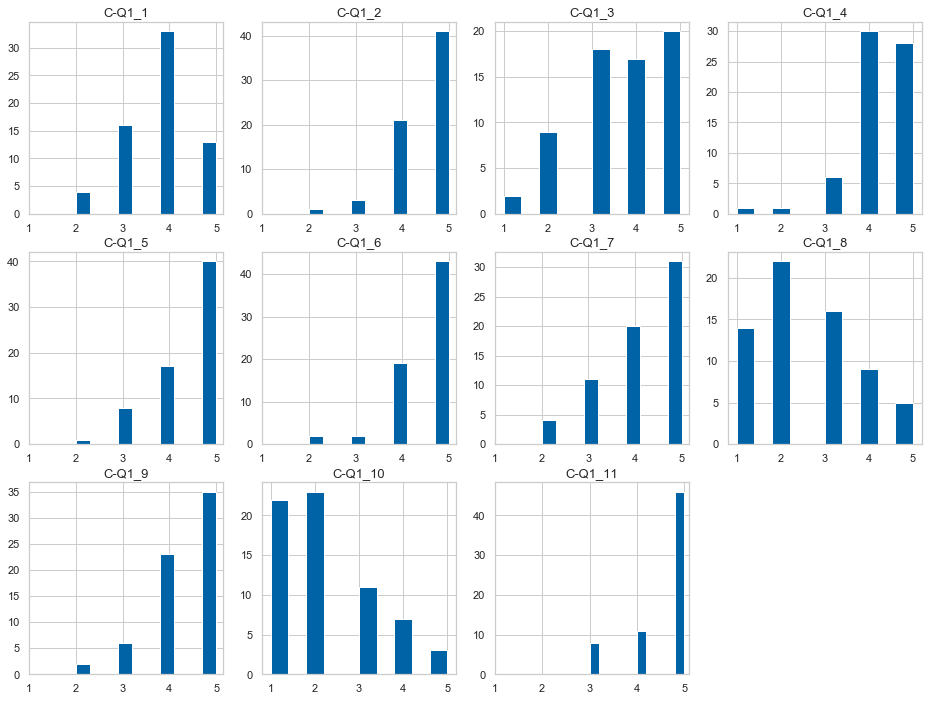

In [116]:
graf_hist(Daten,Liste_C_Q1,16,12,3,4)

In [117]:
Daten_C = Daten[Liste_C_Q1].astype(int64)

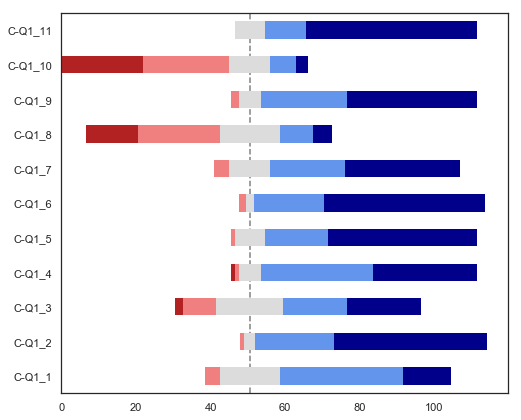

In [169]:
graf_likert1(Daten_C,Liste_C_Q1,7)

In [119]:
df_spearman(Daten,Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9,C-Q1_10,C-Q1_11
C-Q1_1,1,0.0811536,0.312493,0.462076,0.273419,0.378616,0.196583,-0.185478,0.0840304,-0.0158899,0.0370524
C-Q1_2,0.0811536,1,0.00967756,0.280288,0.0985523,0.123212,0.203716,-0.264153,0.514216,-0.317875,0.197296
C-Q1_3,0.312493,0.00967756,1,0.23243,0.386063,0.387446,0.285715,-0.312249,0.235713,-0.0320018,0.191357
C-Q1_4,0.462076,0.280288,0.23243,1,0.297311,0.412377,0.0767676,0.00859947,0.217803,-0.108892,0.22278
C-Q1_5,0.273419,0.0985523,0.386063,0.297311,1,0.526625,0.413529,-0.419929,0.339968,-0.179105,0.347569
C-Q1_6,0.378616,0.123212,0.387446,0.412377,0.526625,1,0.335616,-0.233375,0.385785,-0.0123143,0.369663
C-Q1_7,0.196583,0.203716,0.285715,0.0767676,0.413529,0.335616,1,-0.380997,0.353063,0.0355835,0.32569
C-Q1_8,-0.185478,-0.264153,-0.312249,0.00859947,-0.419929,-0.233375,-0.380997,1,-0.199539,0.205654,-0.189739
C-Q1_9,0.0840304,0.514216,0.235713,0.217803,0.339968,0.385785,0.353063,-0.199539,1,-0.186985,0.328528
C-Q1_10,-0.0158899,-0.317875,-0.0320018,-0.108892,-0.179105,-0.0123143,0.0355835,0.205654,-0.186985,1,0.0163522


In [120]:
df_spearman_pv(Daten,Liste_C_Q1)

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7,C-Q1_8,C-Q1_9,C-Q1_10,C-Q1_11
C-Q1_1,0,0.517135,0.0106334,9.3961e-05,0.0263279,0.00172024,0.113647,0.13596,0.502341,0.899232,0.767715
C-Q1_2,0.517135,0,0.938528,0.0226395,0.431127,0.324323,0.100874,0.032096,1.00337e-05,0.00929733,0.112317
C-Q1_3,0.0106334,0.938528,0,0.0603814,0.00136682,0.00130892,0.0200445,0.0106976,0.0567416,0.79866,0.123767
C-Q1_4,9.3961e-05,0.0226395,0.0603814,0,0.0153373,0.000580364,0.540107,0.945365,0.0789534,0.38412,0.0721832
C-Q1_5,0.0263279,0.431127,0.00136682,0.0153373,0,5.57071e-06,0.000558089,0.000447929,0.00522453,0.150174,0.00424387
C-Q1_6,0.00172024,0.324323,0.00130892,0.000580364,5.57071e-06,0,0.00587176,0.0593147,0.00137875,0.921826,0.00225235
C-Q1_7,0.113647,0.100874,0.0200445,0.540107,0.000558089,0.00587176,0,0.00159925,0.00364018,0.77668,0.00761798
C-Q1_8,0.13596,0.032096,0.0106976,0.945365,0.000447929,0.0593147,0.00159925,0,0.10821,0.0976052,0.127036
C-Q1_9,0.502341,1.00337e-05,0.0567416,0.0789534,0.00522453,0.00137875,0.00364018,0.10821,0,0.132751,0.00707743
C-Q1_10,0.899232,0.00929733,0.79866,0.38412,0.150174,0.921826,0.77668,0.0976052,0.132751,0,0.896316


### Cronbach's Alpha berechnen

In [121]:
CronbachAlpha(Daten[Liste_A_Q3].fillna(3))

0.8850237739074688

In [122]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [123]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [124]:
CronbachAlpha(Daten[Liste_AC_Q])

0.891737311451355

In [125]:
CronbachAlpha(Daten[Liste_C_Q1])

0.49693554461383954

In [126]:
CronbachAlpha(Daten1[Liste_A_Q2])

0.4473818842247971

### Zeitanalyse

In [127]:
Dur = pd.to_numeric(Daten['Duration (in seconds)'])

In [128]:
Dur.describe()

count        66.000000
mean      19404.681818
std       86099.689619
min         663.000000
25%        1093.250000
50%        1333.000000
75%        1769.500000
max      603273.000000
Name: Duration (in seconds), dtype: float64

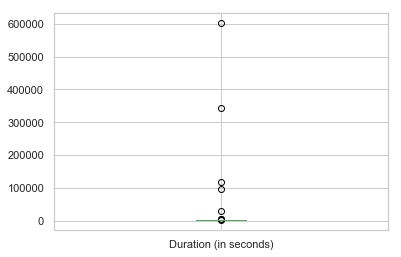

In [129]:
Dur.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyer zu erkennen (z.B. TN, die an einem Tag begonnen und später beendet haben...); diese sollen nicht mit berücksichtigt werden 

Sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen.

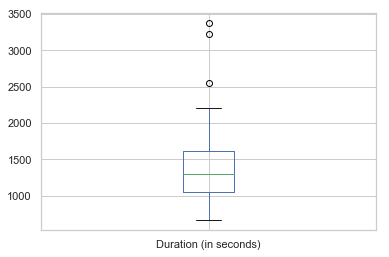

In [130]:
Dur[Dur < 4000].plot.box();

In [131]:
Dur[Dur < 4000].describe()

count      60.000000
mean     1403.333333
std       526.673754
min       663.000000
25%      1059.500000
50%      1305.500000
75%      1614.000000
max      3380.000000
Name: Duration (in seconds), dtype: float64

In [132]:
(Dur[Dur < 4000].mean())/60

23.38888888888889

In [133]:
(Dur[Dur < 4000].min())/60

11.05

In [134]:
(Dur[Dur < 4000].max())/60

56.333333333333336

In [135]:
(Dur[Dur < 4000].std())/60

8.777895896604486

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 23min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde.

### Charakteristika der Stichprobe

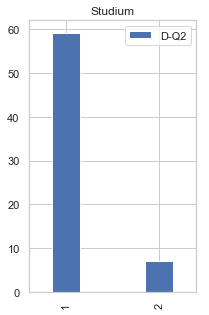

In [136]:
Daten['D-Q2'].value_counts().plot(kind = 'bar', figsize = (3,5), width = 0.3, legend = True, title = "Studium");

(1) Grado, (2) Master

In [137]:
Daten['D-Q2'].value_counts()

1    59
2     7
Name: D-Q2, dtype: int64

C:\Users\Martina\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


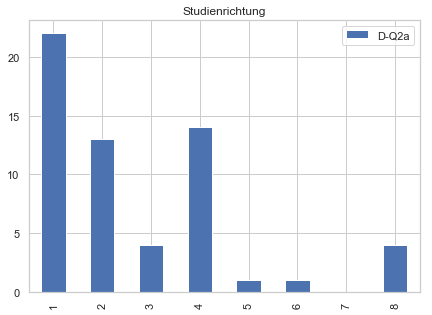

In [138]:
Daten['D-Q2a'].value_counts()[[1,2,3,4,5,6,7,8]].plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Studienrichtung");

In [139]:
Daten['D-Q2a'].value_counts()

1    22
4    14
2    13
0     7
8     4
3     4
6     1
5     1
Name: D-Q2a, dtype: int64

(1)	Estudios Alemanes / Filología Alemana (Germanistikstudium / deutsche Philologie),
(2)	Otras Filologías (Anderes Philologiestudium),
(3)	Traducción, Alemán 1a Lengua Extranjera / B (Übersetzen und Dolmetschen, Erste Fremdsprache / Sprache B),
(4)	Traducción, Alemán 2a Lengua Extranjera / C (Übersetzen und Dolmetschen, Zweite Fremdsprache / Sprache C),
(5)	Humanidades (Humanistisches Studium),
(6)	Economía (Wirtschaftliches Studium),
(7)	Turismo (Tourismus-Studium),
(8)	Otra (Andere)

In [140]:
Daten['D-Q2a_8_TEXT'].value_counts()

0                                                                                      62
Doble grado en Traducción e Interpretación y Derecho (Alemán 2a Lengua Extranjera)      1
filología hispánica                                                                     1
Traducción, inglés+francés                                                              1
Grado en Ingeniería Informática                                                         1
Name: D-Q2a_8_TEXT, dtype: int64

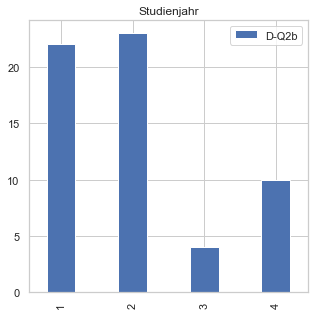

In [141]:
Daten['D-Q2b'].value_counts()[[1,2,3,4]].plot(kind='bar', figsize = (5,5), width = 0.4, legend = True, title = "Studienjahr");

In [142]:
Daten['D-Q2b'].value_counts()[[1,2,3,4]]

1    22
2    23
3     4
4    10
Name: D-Q2b, dtype: int64

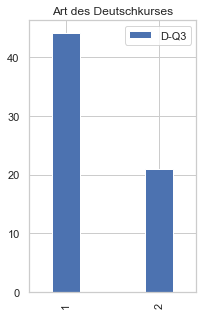

In [143]:
Daten['D-Q3'].value_counts()[[1,2]].plot(kind = 'bar', figsize = (3,5), width = 0.3, legend = True, title = "Art des Deutschkurses");

(1) Pflichtfach, (2) Wahlfach

In [144]:
Daten['D-Q3'].value_counts()

1    44
2    21
0     1
Name: D-Q3, dtype: int64

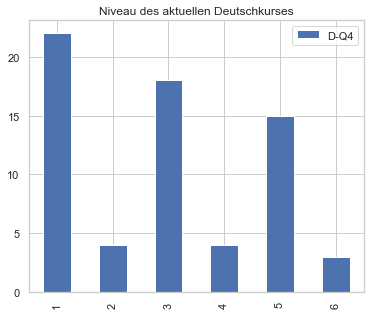

In [145]:
Daten['D-Q4'].value_counts()[[1,2,3,4,5,6]].plot(kind='bar', figsize = (6,5), width = 0.5, legend = True, title = "Niveau des aktuellen Deutschkurses");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

In [146]:
Daten['D-Q4'].value_counts()

1    22
3    18
5    15
4     4
2     4
6     3
Name: D-Q4, dtype: int64

In [147]:
Daten[Daten['D-Q5']!=0]['D-Q5'].describe()

count    64.00000
mean     20.34375
std       2.76152
min      17.00000
25%      18.75000
50%      19.00000
75%      22.00000
max      31.00000
Name: D-Q5, dtype: float64

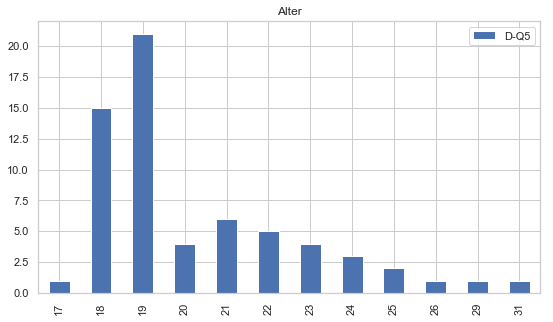

In [148]:
Daten[Daten['D-Q5']!=0]['D-Q5'].astype(integer).value_counts().sort_index().plot(kind='bar', figsize = (9,5), width = 0.5, legend = True, title = "Alter");

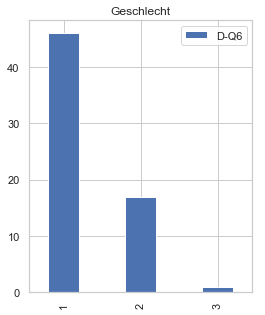

In [149]:
Daten['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [150]:
Daten['D-Q6'].value_counts()

1    46
2    17
0     2
3     1
Name: D-Q6, dtype: int64

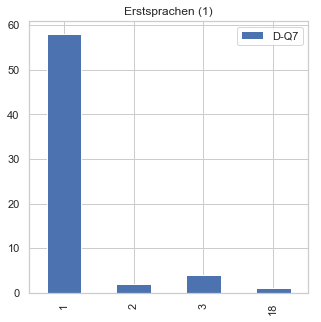

In [151]:
Daten['D-Q7'].value_counts()[[1,2,3,18]].plot(kind='bar', figsize = (5,5), width = 0.5, legend = True, title = "Erstsprachen (1)");

(1) 	Castellano,
(2) 	Catalán (Català), Valenciano (Valencià),
(3) 	Gallego (Galego),
(18)	Ruso (Русский)

In [152]:
Daten['D-Q7'].value_counts()

1     58
3      4
2      2
18     1
0      1
Name: D-Q7, dtype: int64

In [153]:
Daten['D-Q7b'].value_counts()

2    51
1    15
Name: D-Q7b, dtype: int64

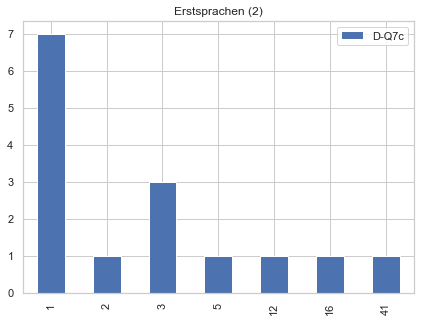

In [154]:
Daten['D-Q7c'].value_counts()[[1,2,3,5,12,16,41]].plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Erstsprachen (2)");

(1) Castellano (Spanisch),
(2) Catalán (Català), Valenciano (Valencià),
(3) Gallego (Galego),
(5) Alemán (Deutsch),
(12) Inglés (English),
(16) Portugués (Português),
(41) Polaco (Polski)

In [155]:
Daten['D-Q7c'].value_counts()

0     51
1      7
3      3
41     1
16     1
12     1
5      1
2      1
Name: D-Q7c, dtype: int64

In [156]:
Daten['D-Q7e'].value_counts()

0    51
2    13
1     2
Name: D-Q7e, dtype: int64

In [157]:
Daten['D-Q7f'].value_counts()

0     64
44     1
12     1
Name: D-Q7f, dtype: int64

(44) Ukrainisch

In [158]:
cols = ['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [159]:
Sprachen = Daten[cols]

In [160]:
DF_Spr = Sprachen.apply(pd.value_counts).fillna(0).astype(integer)
ix_sorted = list(DF_Spr[1:].sum(axis = 1).sort_values(ascending=False).index)

All = []
for i in DF_Spr.index:
    All.append((DF_Spr.loc[i]).sum())

DF_Spr['All'] = All

In [161]:
DF_Spr.loc[ix_sorted[:10]]

,D-Q8_1,D-Q8_2,D-Q8_3,D-Q8_4,D-Q8_5,D-Q8_6,D-Q8_7,All
12,54,8,0,1,0,0,0,63
5,5,12,25,8,10,2,0,62
10,0,34,10,3,0,0,1,48
21,1,4,16,11,2,2,0,36
13,0,1,0,9,5,4,4,23
20,0,1,2,7,8,2,0,20
15,0,0,1,2,2,2,3,10
16,1,1,2,2,1,2,0,9
18,0,0,1,1,3,3,0,8
14,0,0,1,1,0,1,1,4


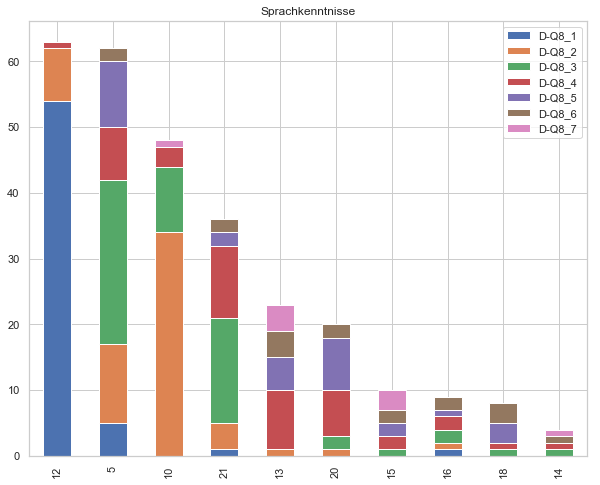

In [162]:
DF_Spr[cols].loc[ix_sorted[:10]].plot(kind='bar', figsize = (10,8), stacked = True, legend = True, title = "Sprachkenntnisse");

In [163]:
Anzahl_Sprachen = []

for i in Daten1.index:
    Spr_arr = Daten1[cols].loc[i].unique()
    Spr_arr = Spr_arr[Spr_arr != 0]
    Anzahl_Sprachen.append(len(Spr_arr))

In [164]:
Daten1['V_Spr_Zahl'] = Anzahl_Sprachen

In [165]:
Daten1[Daten1['V_Spr_Zahl']!=0]['V_Spr_Zahl'].describe()

count    64.000000
mean      4.765625
std       1.477258
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: V_Spr_Zahl, dtype: float64